In [1]:
##
##
##
## PowerSystem_Dataset
##
##o

In [2]:
##
##
##
## preprocessing du dataset
##
##
## 

In [1]:

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from scipy.stats import entropy
from statsmodels.tsa import stattools
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import *

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
#on rassemble tous les datasets
data_1 = pd.read_csv("data1.csv")
for dataseti in range(2,16):
    data_1 = pd.concat([data_1,  pd.read_csv("data"+str(dataseti)+".csv")],ignore_index = True)

In [3]:
##
##
##
## description du dataset 
##
##
## 

In [4]:
data_1.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,...,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000,78377.000000
mean,-15.802424,130764.039577,2.175196,131035.528095,6.834315,131395.717581,-14.334996,393.949321,3.538540,387.438133,...,0.000026,0.000026,0.035916,0.026436,0.026500,0.035597,0.000051,0.000051,0.000089,0.000077
std,100.876750,8546.118477,111.743169,5393.135370,97.065063,5443.752388,99.601107,190.966011,109.504977,151.277183,...,0.005051,0.005051,0.186082,0.160430,0.160618,0.185285,0.007144,0.007144,0.009450,0.008749
min,-179.988962,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-100.416583,131057.982300,-102.129727,130732.029800,-69.459673,131133.202100,-98.159129,305.793700,-94.790138,311.836330,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-28.865614,131684.814000,8.118812,131358.861500,13.401483,131760.033900,-23.514188,378.671480,1.885031,383.249230,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.096034,132186.279400,104.897113,131885.400200,85.324875,132261.499300,66.274028,456.676340,102.674037,460.338540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,179.994691,151592.990400,179.994691,151567.917200,179.988962,151693.283500,179.994691,1779.462980,179.994691,1265.656320,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data_1.columns.values

array(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PA8:VH',
       'R1-PM8:V', 'R1-PA9:VH', 'R1-PM9:V', 'R1-PA10:IH', 'R1-PM10:I',
       'R1-PA11:IH', 'R1-PM11:I', 'R1-PA12:IH', 'R1-PM12:I', 'R1:F',
       'R1:DF', 'R1-PA:Z', 'R1-PA:ZH', 'R1:S', 'R2-PA1:VH', 'R2-PM1:V',
       'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH',
       'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I',
       'R2-PA7:VH', 'R2-PM7:V', 'R2-PA8:VH', 'R2-PM8:V', 'R2-PA9:VH',
       'R2-PM9:V', 'R2-PA10:IH', 'R2-PM10:I', 'R2-PA11:IH', 'R2-PM11:I',
       'R2-PA12:IH', 'R2-PM12:I', 'R2:F', 'R2:DF', 'R2-PA:Z', 'R2-PA:ZH',
       'R2:S', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PA2:VH', 'R3-PM2:V',
       'R3-PA3:VH', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PA5:IH',
       'R3-PM5:I', 'R3-PA6:IH', 'R3-PM6:I', 'R3-PA7:VH', 'R3-PM7:V',
       'R3-PA8:VH',

In [6]:
print(pd.Series(data_1['marker']).value_counts())

Attack      55663
Natural     18309
NoEvents     4405
Name: marker, dtype: int64


In [7]:
data_1 = data_1.replace({'Attack': 2, 'Natural': 1,'NoEvents':0})

In [8]:
data_1.isnull().values.any()#nan values ?

False

In [9]:
data_1.isnull().any().any()

False

In [10]:
is_infini = np.isinf(data_1)

row_has_infini = is_infini.any(axis=1)

rows_with_infini = data_1[row_has_infini]

In [11]:
rows_with_infini.iloc[150].values
#il y a des valeurs infinies

array([-1.24091199e+02,  5.85711587e+04,  1.31390682e+02,  1.22608290e+05,
       -6.80100903e+00,  1.26469574e+05,  1.78092472e+02,  1.68149913e+03,
       -1.43972835e+02,  5.34681200e+01,  8.35028691e+01,  5.82289800e+01,
       -1.19043441e+02,  1.01396304e+05,  6.77866367e+01,  3.30967164e+04,
        6.77178818e+01,  1.02549674e+04, -1.79994691e+02,  5.28272350e+02,
        1.77175739e+02,  5.80458700e+02,  1.77250224e+02,  5.72951190e+02,
        6.00560000e+01, -2.00000000e-01,  5.15957647e-01,  1.17204394e+00,
        2.05800000e+03, -1.49735423e+02,  1.26584250e+05,  9.03213492e+01,
        1.26429305e+05, -2.97207656e+01,  1.26661039e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.49713444e+02,  1.26556773e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [12]:
rows_with_infini[rows_with_infini['marker']==1].count()

R1-PA1:VH     2086
R1-PM1:V      2086
R1-PA2:VH     2086
R1-PM2:V      2086
R1-PA3:VH     2086
              ... 
snort_log1    2086
snort_log2    2086
snort_log3    2086
snort_log4    2086
marker        2086
Length: 129, dtype: int64

In [13]:
#on remplace les valeurs infinies par 2 fois la valeur max du dataset
for column in data_1:
    is_infini = np.isinf(data_1[column]).any()
    if is_infini == True:
        data_1[column] = data_1[column].replace({np.inf: data_1[column][data_1[column]!=np.inf].max() *2, -np.inf: data_1[column][data_1[column]!= -np.inf].max() *2})
        

In [14]:
is_infini = np.isinf(data_1)

row_has_infini = is_infini.any(axis=1)

rows_with_infini = data_1[row_has_infini]
rows_with_infini.count()

R1-PA1:VH     0
R1-PM1:V      0
R1-PA2:VH     0
R1-PM2:V      0
R1-PA3:VH     0
             ..
snort_log1    0
snort_log2    0
snort_log3    0
snort_log4    0
marker        0
Length: 129, dtype: int64

In [15]:
list_ndiscrt = list(data_1.columns.values)
list_ndiscrt.remove('marker')



In [20]:
len(data_1.columns)

129

In [18]:
############### preprocessing from sklearn.preprocessing import MinMaxScaler

In [19]:
from sklearn.preprocessing import RobustScaler

In [20]:
scaler = RobustScaler()
data_1_x = data_1.drop(['marker'],axis=1)

In [21]:
data_1[list_ndiscrt] = scaler.fit_transform(data_1_x)

In [22]:
data_1

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,0.589065,-3.555556,-0.278665,-3.217391,-1.182158,-3.577778,0.542493,1.506068,-0.298224,1.639951,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.608582,-1.244444,-0.262862,-0.956522,-1.160837,-1.244444,0.579846,0.695388,-0.267555,0.792848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.608854,-1.222222,-0.262641,-0.934783,-1.160540,-1.222222,0.579707,0.695388,-0.267380,0.792848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.610928,-0.977778,-0.260925,-0.695652,-1.158282,-0.977778,0.581797,0.690534,-0.264972,0.780518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.613716,-0.533333,-0.258628,-0.260870,-1.155321,-0.533333,0.581588,0.701456,-0.262825,0.770654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,1.011526,0.177778,0.065148,0.434783,-0.722191,0.177778,1.014774,-0.458738,0.102658,-0.458693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78373,1.011152,0.244444,0.064954,0.478261,-0.722562,0.222222,1.012718,-0.452670,0.101439,-0.456227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78374,1.010200,0.311111,0.064124,0.543478,-0.723672,0.288889,1.006272,-0.433252,0.098044,-0.445129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78375,1.010098,0.311111,0.064014,0.543478,-0.723709,0.311111,1.005540,-0.434466,0.097783,-0.442663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
#on prépare un dataet PCA

In [17]:
######################### pca

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components = 25)

In [20]:
Y = data_1.drop(list_ndiscrt,axis=1)

In [21]:
principalComponents = pca.fit_transform(data_1.drop(['marker'],axis=1))

In [22]:
data_1_pca = pd.DataFrame(data = principalComponents)

In [23]:
data_1_pca = pd.concat([data_1_pca,Y],axis=1)
data_1_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,marker
0,-1516.776575,-915.244714,48.669207,1.262835,-11.897859,18.673553,-167.291973,15.360189,-45.433512,-1.100212,...,0.080226,-70.112399,-1.794901,2.434109,-0.571200,98.399530,-4.171950,-1.954332,2.254806,0
1,-1516.775967,-915.328072,48.671011,1.210505,-23.953490,18.833304,-167.349325,15.202823,-45.991966,-1.081606,...,0.082769,-80.754216,0.604320,2.726187,0.021407,-15.374602,-4.068744,0.434862,0.765517,0
2,-1516.775859,-915.329344,48.665836,1.207808,-24.989758,18.837529,-167.348792,15.219073,-46.011968,-1.113104,...,0.123375,-81.133589,0.615526,2.718632,-1.550039,-15.358276,-4.155790,0.030216,0.758631,0
3,-1516.776217,-915.330266,48.682514,1.217378,-20.995115,18.792810,-167.351842,15.253377,-46.041832,-1.113509,...,0.126382,-80.981799,0.674072,2.737879,-0.234423,-15.201498,-4.087197,0.264164,0.756055,0
4,-1516.776537,-915.331625,48.704728,1.233953,-15.447308,18.745680,-167.361890,15.255120,-46.070621,-1.066954,...,0.047991,-81.879950,0.705299,2.783444,-0.518272,-15.038934,-4.141606,0.442554,0.706724,0


In [31]:
########################## test classifiers sur données brutes

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn import ensemble

In [24]:
data_1_train = data_1.sample(frac=0.7)
data_1_test = data_1.drop(data_1_train.index)

data_1_train_x = data_1_train.drop(['marker'],axis=1)
data_1_train_y = data_1_train['marker']

data_1_test_x = data_1_test.drop(['marker'],axis=1)
data_1_test_y = data_1_test['marker']

In [14]:
## decision tree

In [15]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [16]:
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8542083102964317

In [17]:
confusion_matrix(data_1_test_y, y_dct)

array([[ 1140,    44,   124],
       [   44,  3890,  1526],
       [  134,  1556, 15055]])

In [52]:
## random forest

In [53]:
model = ensemble.RandomForestClassifier()

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9126440692382937

In [54]:
from sklearn.metrics import f1_score
confusion_matrix(data_1_test_y, y_dct)

array([[ 1257,     6,    79],
       [    4,  3908,  1578],
       [   21,   366, 16294]])

In [55]:
f1_score(data_1_test_y, y_dct, average=None)

array([0.95807927, 0.8       , 0.94097944])

Text(0.5, 1.0, 'importance de la feature')

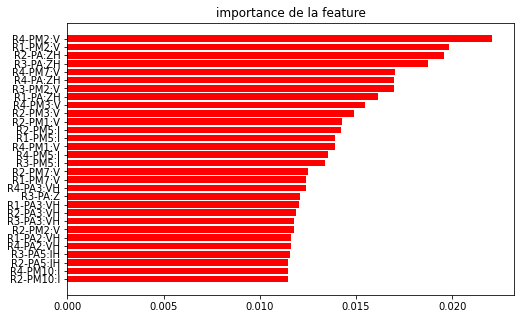

In [56]:
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)),importances[indices],color='r',align='center')
plt.yticks(range(len(indices)),data_1.columns[indices])
plt.title("importance de la feature")

In [61]:
print("accuracy score, f1, and precision")

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
print(accuracy_score(data_1_test_y, y_dct))
print(f1_score(data_1_test_y, y_dct, average='macro'))
print(precision_score(data_1_test_y, y_dct, average='macro'))

accuracy score, f1, and precision
0.9126440692382937
0.8996862364240412
0.9337588322815101


In [43]:
########## autres

In [43]:
model = KNeighborsClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8402684563758389

In [47]:
model = GradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7480117381873858

In [48]:
f1_score(data_1_test_y, y_dct, average=None)

array([0.67980296, 0.15871486, 0.8470753 ])

In [45]:
model = GaussianNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.16845637583892617

In [46]:
model = SVC()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7872483221476511

In [59]:


from sklearn import tree

model = tree.ExtraTreeClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8609705269425424

In [60]:
f1_score(data_1_test_y, y_dct, average=None)

array([0.83289125, 0.73412447, 0.90518172])

In [62]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9263386211882788

In [63]:
f1_score(data_1_test_y, y_dct, average=None)

array([0.96431283, 0.83817915, 0.94976154])

In [64]:
print("accuracy score, f1, and precision")

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
print(accuracy_score(data_1_test_y, y_dct))
print(f1_score(data_1_test_y, y_dct, average='macro'))
print(precision_score(data_1_test_y, y_dct, average='macro'))

accuracy score, f1, and precision
0.9263386211882788
0.9174178386804274
0.9388814952737286


In [51]:


from sklearn.neighbors import NearestCentroid

model = NearestCentroid()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.04899328859060403

In [50]:


from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.6140939597315436

In [53]:

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,100,30), max_iter=1000,
                     solver='sgd')

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,   y_dct)

0.7912751677852349

In [54]:
from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.5932885906040268

In [53]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8275847403563986

In [54]:
f1_score(data_1_test_y, y_dct, average=None)

array([0.92109375, 0.50656804, 0.88977474])

In [55]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
model = BaggingClassifier(base_estimator=tree.ExtraTreeClassifier(), n_estimators=10, random_state=0)
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)


0.9023944201080254

In [56]:
f1_score(data_1_test_y, y_dct, average=None)

array([0.92498005, 0.79830508, 0.93333333])

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
model = BaggingClassifier(base_estimator=HistGradientBoostingClassifier(), n_estimators=10, random_state=0)
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)


In [57]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    ('etc', tree.ExtraTreeClassifier()),
    ('hgbc', HistGradientBoostingClassifier())
    
]
model = VotingClassifier(classifiers)

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8659039680176923

In [58]:
f1_score(data_1_test_y, y_dct, average=None)

array([0.87112676, 0.75017409, 0.90611047])

In [25]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('erf', ExtraTreesClassifier()),
     ('hist', HistGradientBoostingClassifier() ),
     ('dtre',  tree.DecisionTreeClassifier() ),
    ('knn',  KNeighborsClassifier() )
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=AdaBoostClassifier()
)



clf.fit(data_1_train_x, data_1_train_y).score(data_1_test_x, data_1_test_y)


y_dct = clf.predict(data_1_test_x)


print("accuracy score, f1, and precision")

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
print(accuracy_score(data_1_test_y, y_dct))
print(f1_score(data_1_test_y, y_dct, average='macro'))
print(precision_score(data_1_test_y, y_dct, average='macro'))

accuracy score, f1, and precision
0.9256156168927827
0.9182376441598818
0.9407543370393024


In [59]:
#######  classifiers with pca

In [25]:
data_1_train = data_1_pca.sample(frac=0.7)
data_1_test = data_1_pca.drop(data_1_train.index)

data_1_train_x = data_1_train.drop(['marker'],axis=1)
data_1_train_y = data_1_train['marker']

data_1_test_x = data_1_test.drop(['marker'],axis=1)
data_1_test_y = data_1_test['marker']

In [64]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [65]:
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.689363330923319

In [66]:
confusion_matrix(data_1_test_y, y_dct)

array([[  823,   108,   420],
       [   99,  2411,  3031],
       [  426,  3220, 12975]])

In [67]:
model = ensemble.RandomForestClassifier()

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
print(accuracy_score(data_1_test_y,y_dct))

print(confusion_matrix(data_1_test_y, y_dct))

0.7838642453111045
[[  845     6   500]
 [   17  1636  3888]
 [  113   558 15950]]


In [ ]:
model = KNeighborsClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

In [66]:
model = GradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8114093959731543

In [67]:
model = SVC()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7825503355704698

In [68]:


from sklearn import tree

model = tree.ExtraTreeClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8080536912751678

In [ ]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

In [70]:
model = GaussianNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.18926174496644296

In [71]:


from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.6389261744966444

In [72]:


from sklearn.neighbors import NearestCentroid

model = NearestCentroid()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.06577181208053691

In [73]:

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(30,30,10), max_iter=1000,
                     solver='sgd')

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,   y_dct)

0.7832214765100671

In [74]:
from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7463087248322148

In [75]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8671140939597315

In [76]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    ('etc', tree.ExtraTreeClassifier()),
    ('hgbc', HistGradientBoostingClassifier()),
    ('knc', KNeighborsClassifier()),
]
model = VotingClassifier(classifiers)

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8503355704697987

In [ ]:
############# stack  ################

In [29]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

estimators = [
     ('erf', ExtraTreesClassifier()),
     ('hist', HistGradientBoostingClassifier() ),
     ('dtre',  tree.DecisionTreeClassifier() ),
    ('knn',  KNeighborsClassifier() )
    
   
]
clf = StackingClassifier(
     estimators=estimators, final_estimator=AdaBoostClassifier()
)



clf.fit(data_1_train_x, data_1_train_y).score(data_1_test_x, data_1_test_y)


y_dct = clf.predict(data_1_test_x)


print("accuracy score, f1, and precision")

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
print(accuracy_score(data_1_test_y, y_dct))
print(f1_score(data_1_test_y, y_dct, average='macro'))
print(precision_score(data_1_test_y, y_dct, average='macro'))

accuracy score, f1, and precision
0.7841194232977502
0.7320483631934799
0.7539323943278449
